# InnAi Results

After the models have been trained, their performance must be tested on unknown data. This is done here.

In [277]:
from enum import Enum
from typing_extensions import List
import json
import matplotlib.pyplot as plt 
import datetime
import numpy as np

In [278]:
year_from = 2019
year_to = 2023
month = 9

In [279]:
class InnAiModel(Enum):
    SALMON_SWIRL = "salmon_swirl"
    ROACH_RIVER = "roach_river"
    ZANDER_ZENITH = "zander_zenith"

In [280]:
class ModelResultDay:
    day: str
    averageDeviation: float

    @staticmethod
    def from_json(json: any):
        ret = ModelResults()
        ret.averageDeviation = json["averageDeviation"]
        ret.day = json["day"]
        return ret

class ModelResults:
    days: List[ModelResultDay]
    sumDeviation: float
    averageDeviation: float

    @staticmethod
    def from_json(json: any):
        ret = ModelResults()
        ret.days = [ModelResultDay.from_json(x) for x in json["days"]]
        ret.sumDeviation = json["sumDeviation"]
        ret.averageDeviation = json["averageDeviation"]
        return ret

In [281]:
def load_results(model_name: InnAiModel, year: int, month: int) -> ModelResults:
    file = json.load(open(f"./models/{model_name.value}/{year}-{str(month).zfill(2)}.json"))
    return ModelResults.from_json(file)

In [282]:
def get_values_for_month_chart(model_name: InnAiModel, year_from: int, year_to: int, month: int) -> List[float]:
    average_deviations = []

    for year in range(year_from, year_to + 1):
        res = load_results(model_name, year, month)
        average_deviations.append(res.averageDeviation)
    
    return average_deviations

In [283]:
def plot_month_chart(year_from: int, year_to: int, month: int):
    labels = [str(year) for year in range(year_from, year_to + 1)]
    
    s_values = get_values_for_month_chart(InnAiModel.SALMON_SWIRL, year_from, year_to, month)
    r_values = get_values_for_month_chart(InnAiModel.ROACH_RIVER, year_from, year_to, month)
    z_values = get_values_for_month_chart(InnAiModel.ZANDER_ZENITH, year_from, year_to, month)
    
    values = {
        'Salmon Swirl': [round(x, 2) for x in s_values],
        'Roach River': [round(x, 2) for x in r_values],
        'Zander Zenith': [round(x, 2) for x in z_values]
    }
    
    datetime_object = datetime.datetime.strptime(str(month), "%m")
    
    x = np.arange(len(labels))
    bar_width = 0.3 
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize=(10, 4))
    
    for label, values in values.items():
        offset = bar_width * multiplier
        rects = ax.bar(x + offset, values, bar_width, label=label)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    ax.set_ylabel('Average deviation (cm)')
    ax.set_title(f'Compare average deviation in {datetime_object.strftime("%B")}')
    ax.set_xticks(x + bar_width, labels)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 50)
    
    plt.show()
    

## Model Performance Overview

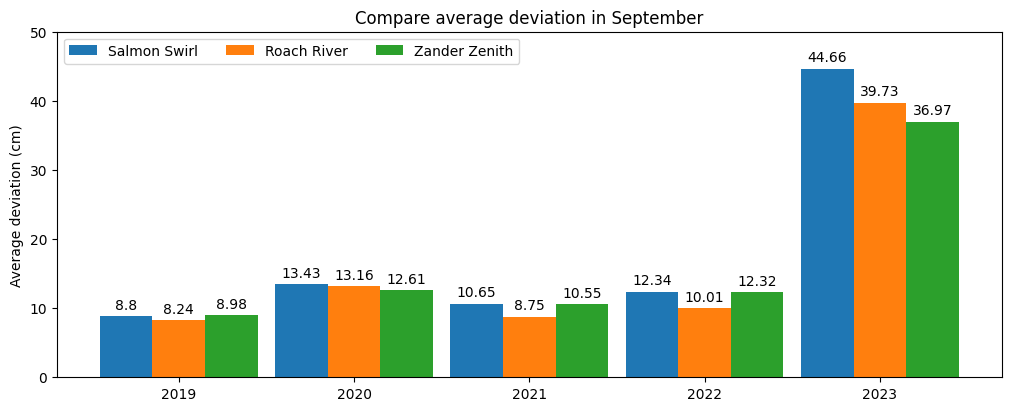

In [284]:
plot_month_chart(year_from, year_to, month)

## Overall Model Performance Chart

In [304]:
def plot_overall_model_chart(year_from: int, year_to: int, month: int):
    labels = [f"From {year_from} to {year_to}"]
    
    s_values = get_values_for_month_chart(InnAiModel.SALMON_SWIRL, year_from, year_to, month)
    r_values = get_values_for_month_chart(InnAiModel.ROACH_RIVER, year_from, year_to, month)
    z_values = get_values_for_month_chart(InnAiModel.ZANDER_ZENITH, year_from, year_to, month)
    
    values = {
        'Salmon Swirl': [round(sum(s_values) / len(s_values), 2)],
        'Roach River': [round(sum(r_values) / len(r_values), 2)],
        'Zander Zenith': [round(sum(z_values) / len(z_values), 2)]
    }
    
    datetime_object = datetime.datetime.strptime(str(month), "%m")
    
    x = np.arange(len(labels))
    bar_width = 0.3 
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize=(10, 4))
    
    for label, values in values.items():
        offset = bar_width * multiplier
        rects = ax.bar(x + offset, values, bar_width, label=label)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    ax.set_ylabel('Average deviation (cm)')
    ax.set_title(f'Compare average deviation in {datetime_object.strftime("%B")}')
    ax.set_xticks(x + bar_width, labels)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 25)
    
    plt.show()

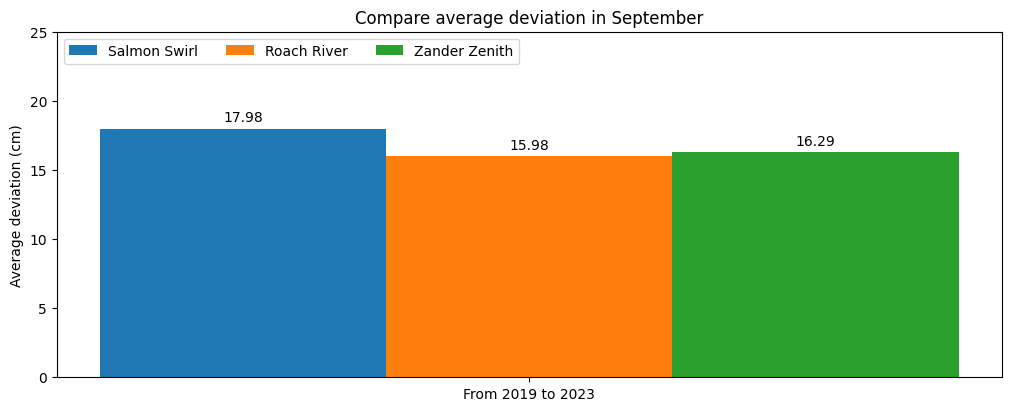

In [305]:
plot_overall_model_chart(year_from, year_to, month)

## Day by day performance of each model

In [285]:
def plot_model_chart(model: InnAiModel, year_from: int, year_to: int, month: int):
    years = [year for year in range(year_from, year_to + 1)]
    
    values = []
    
    figure = plt.figure(figsize=(12, 8))
    
    subplot_factor = len(years) * 100 + 10
    plt.tight_layout()
    plt.subplots_adjust(top=3, bottom=0.1)
    
    datetime_object = datetime.datetime.strptime(str(month), "%m")

    
    for i in range(len(years)):
        year = years[i]
        ax = figure.add_subplot(subplot_factor + i + 1)
        
        ax.set_title(f"{datetime_object.strftime("%B")} {str(year)}")
        ax.set_ylabel('Average deviation (cm)')
        ax.set_xlabel('Day of month')
        
        results = load_results(model, year, month)
        
        data = [x.averageDeviation for x in results.days]
        plt.plot(data)
        
    plt.show()

### Salmon Swirl

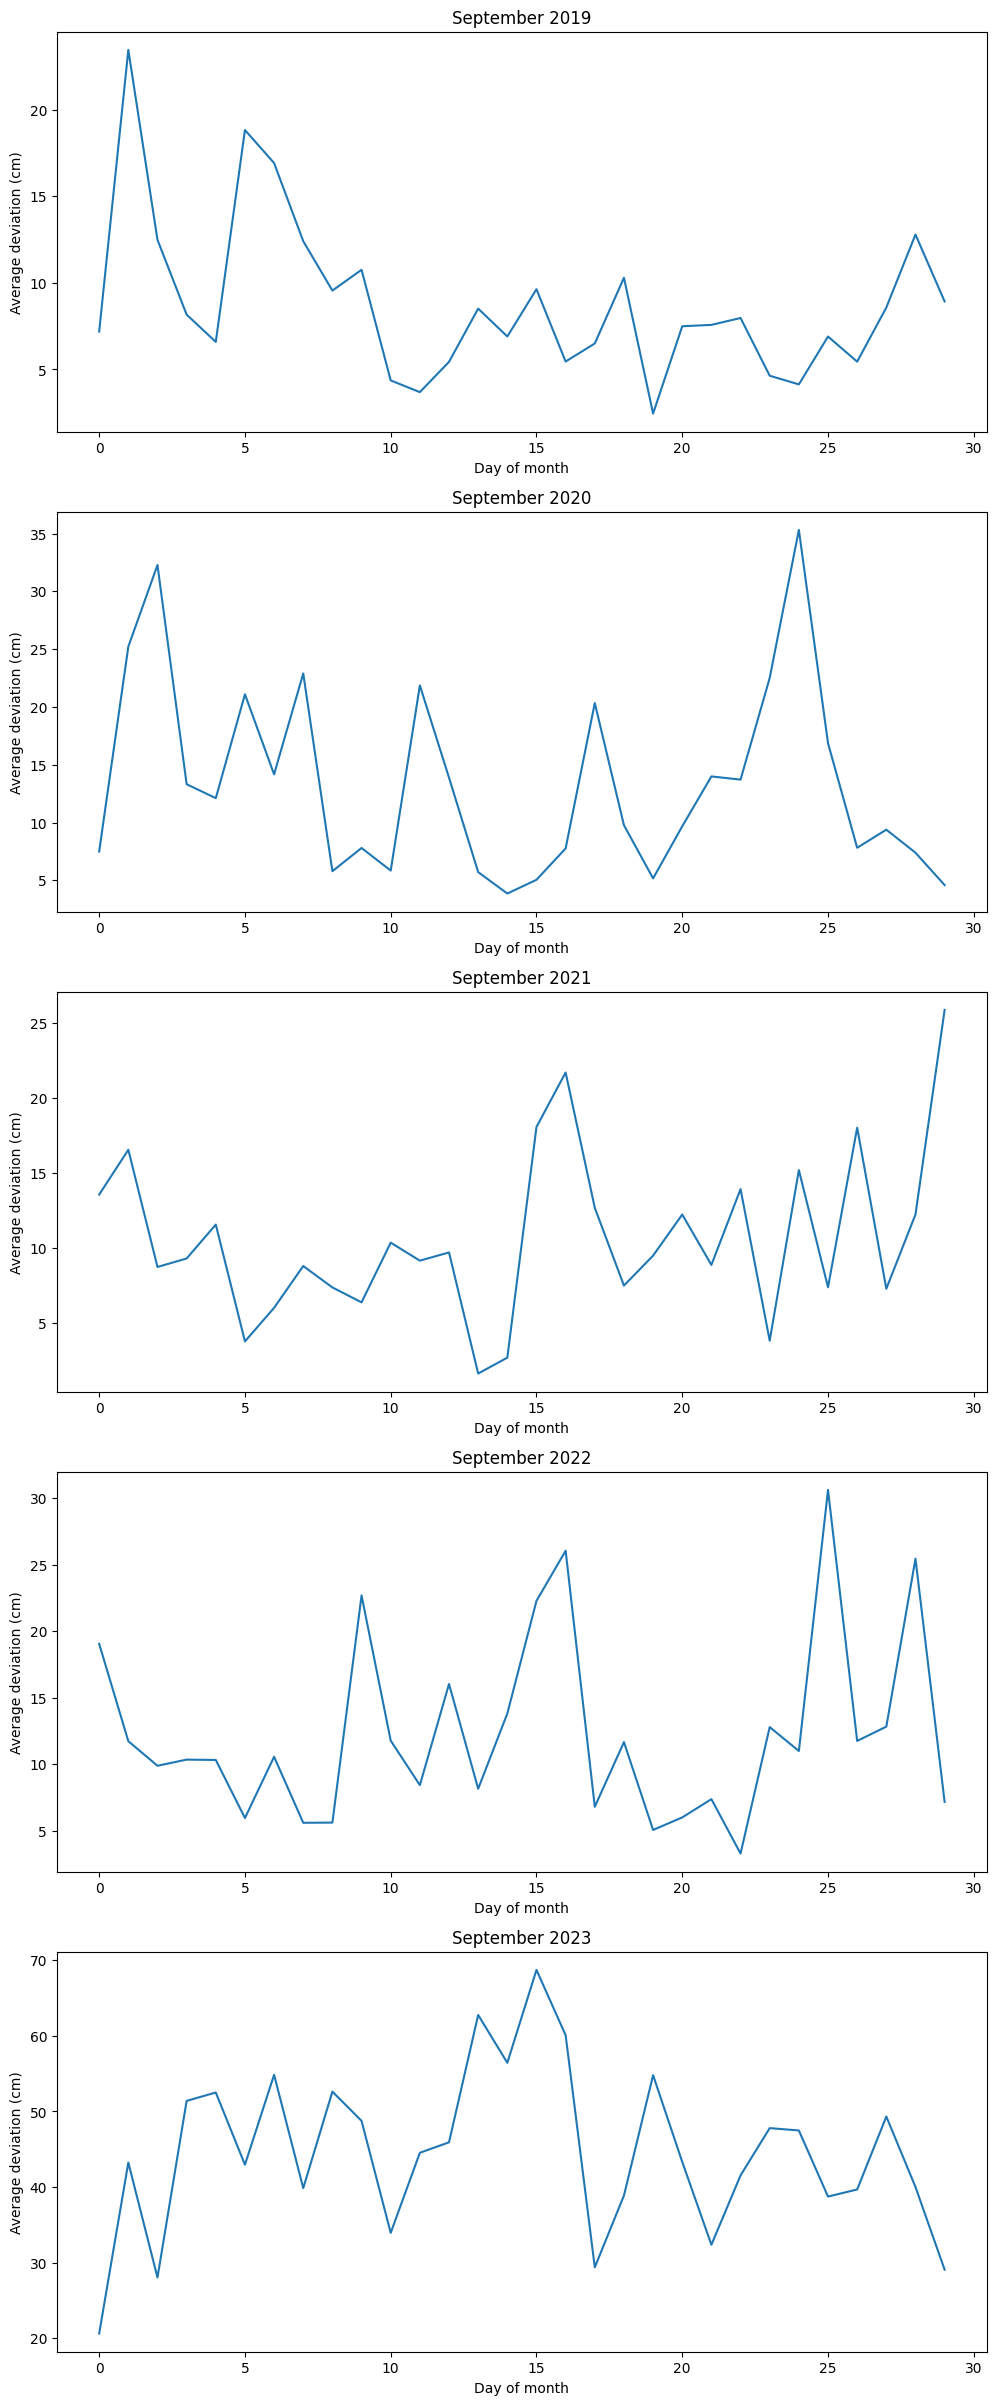

In [286]:
plot_model_chart(InnAiModel.SALMON_SWIRL, year_from, year_to, month)

### Roach River

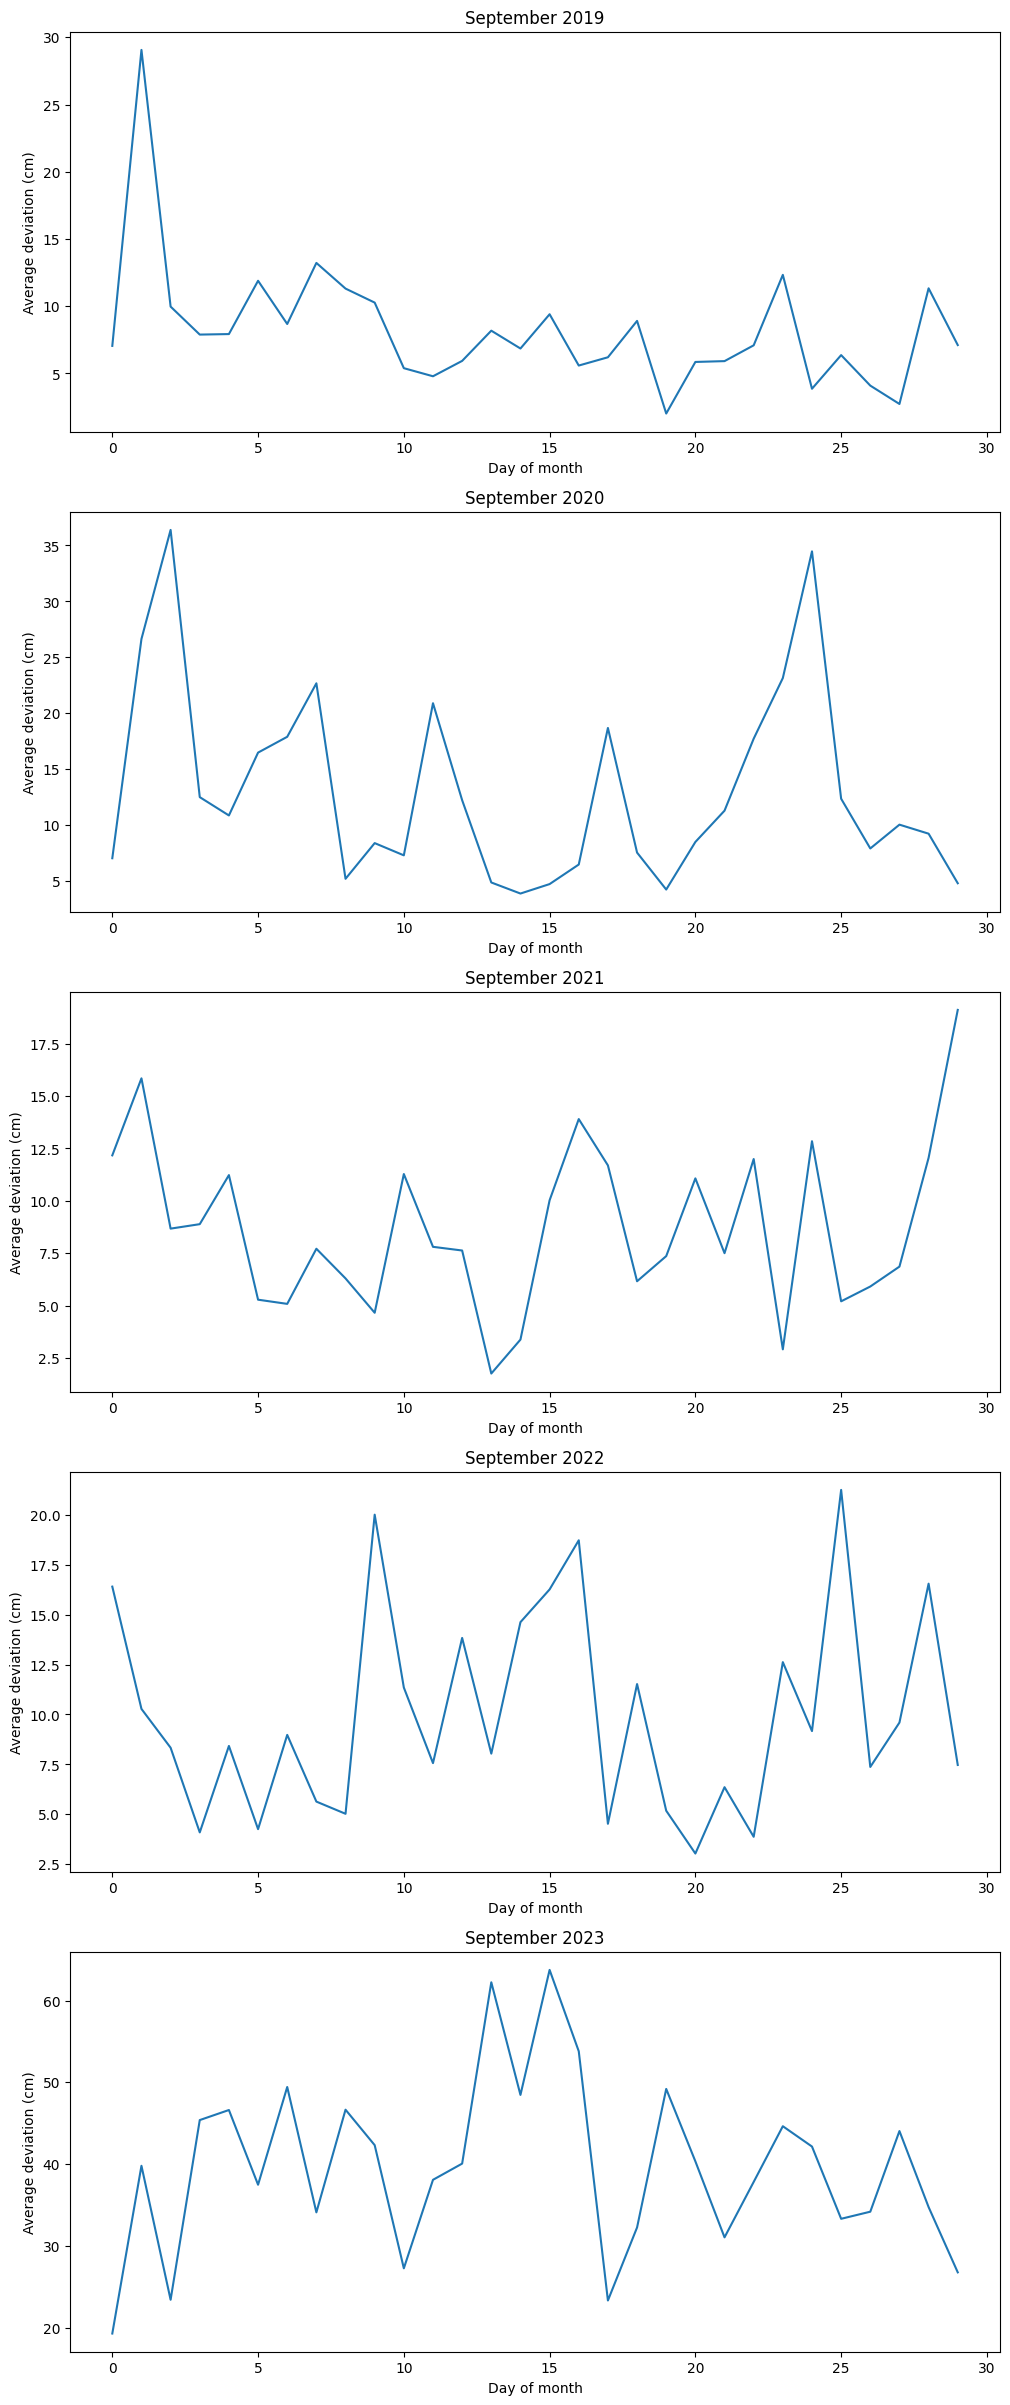

In [287]:
plot_model_chart(InnAiModel.ROACH_RIVER, year_from, year_to, month)

### Zander Zenith

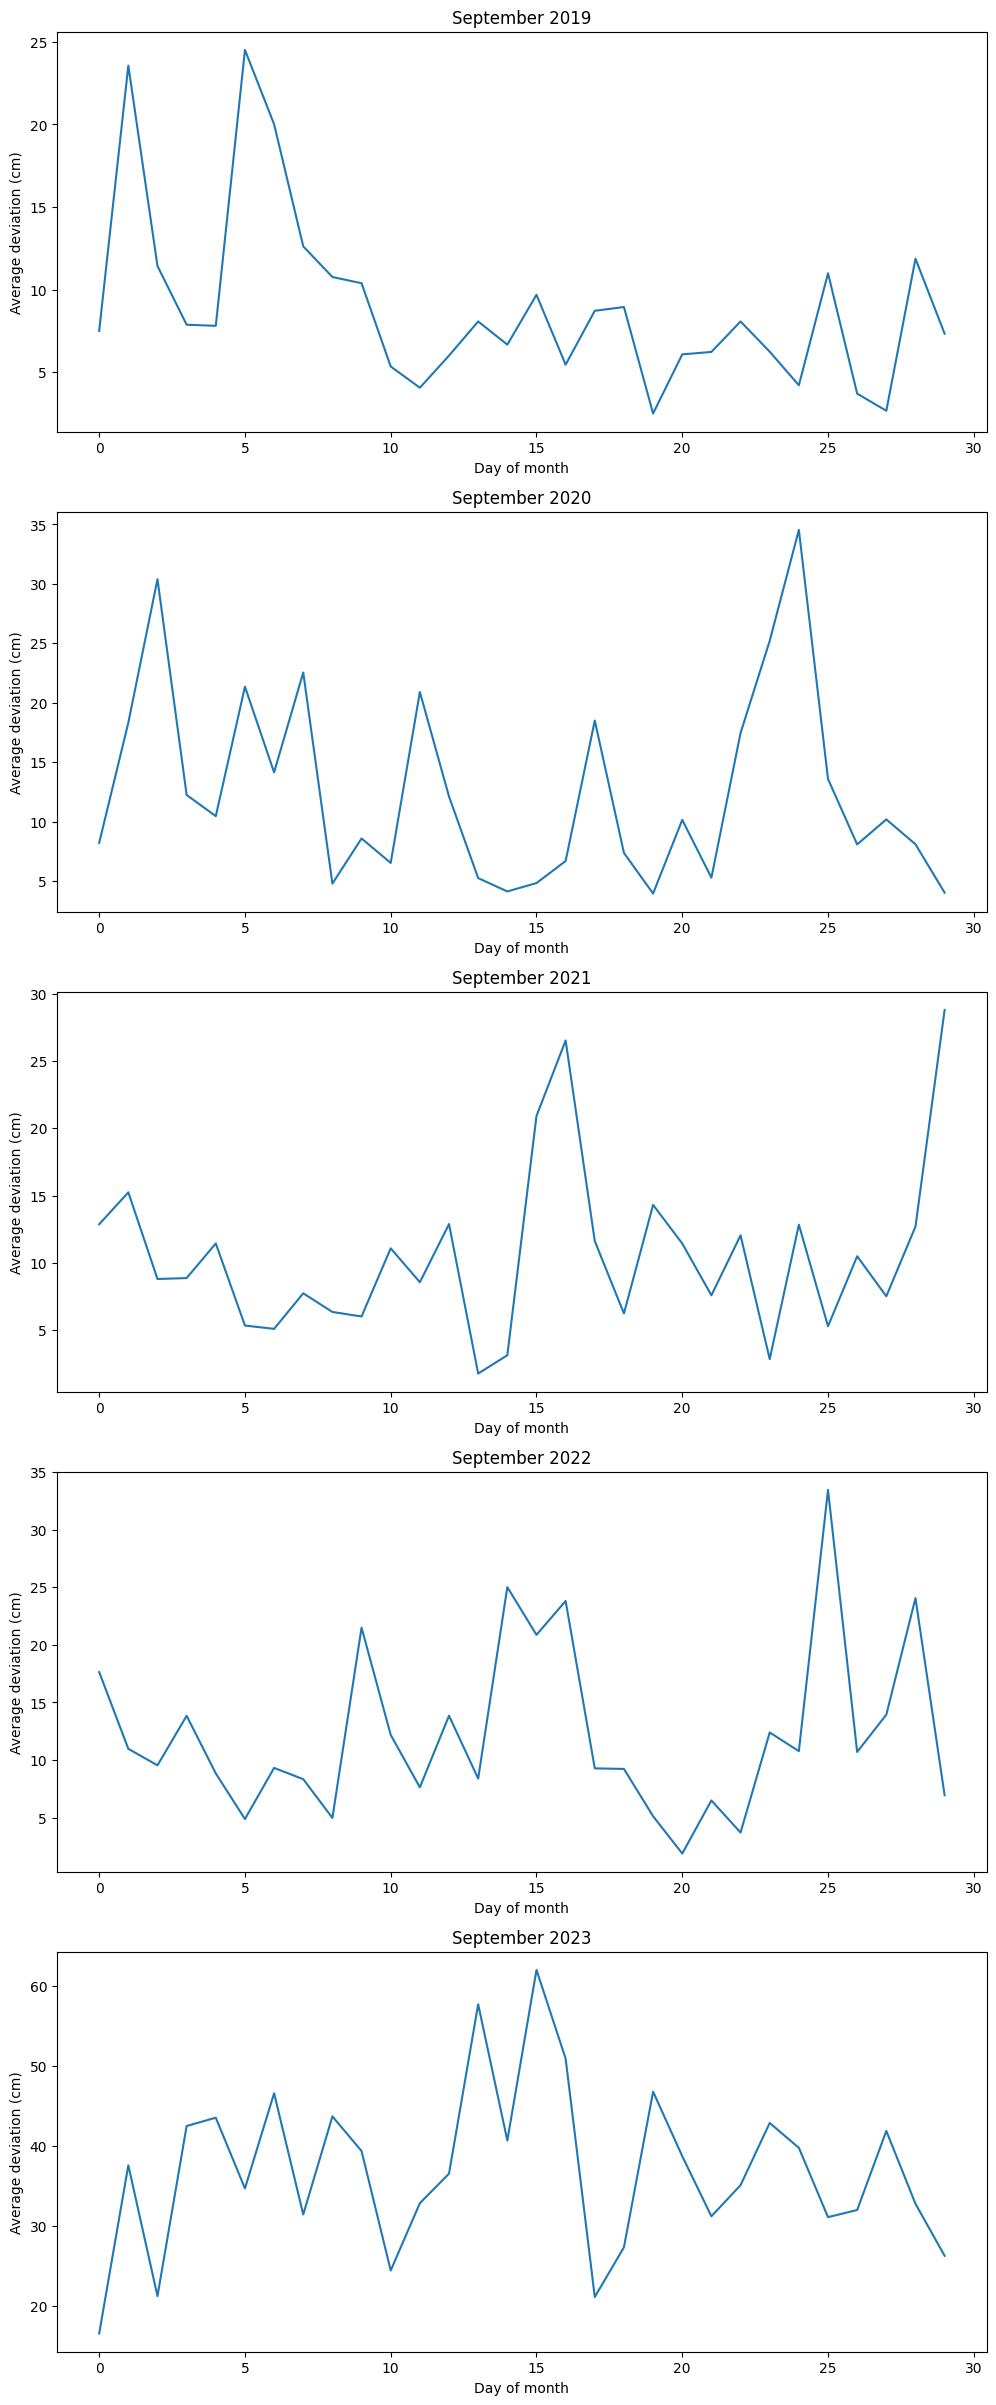

In [288]:
plot_model_chart(InnAiModel.ZANDER_ZENITH, year_from, year_to, month)